In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/amazon-sales-dataset/Amazon.csv")
df["discounted_price"] = df["discounted_price"].str.replace("₹", "")
df["discounted_price"] = df["discounted_price"].str.replace(",", "")
df["discounted_price"] = df["discounted_price"].astype(float)
df["actual_price"] = df["actual_price"].str.replace("₹", "")
df["actual_price"] = df["actual_price"].str.replace(",", "")
df["actual_price"] = df["actual_price"].astype(float)
df["rating"] = df["rating"].str.replace("|", "0")
df["rating"] = df["rating"].astype(float)
df["rating_count"] = df["rating_count"].str.replace(",", "")
df["rating_count"] = df["rating_count"].astype(float)

# EDA-1 : Category and Average Discount:

In [3]:
df["category"] = df["category"].str.split("|").str[0]
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "")
df["discount_percentage"] = df["discount_percentage"].astype(float)
df["discount_percentage"] = df["discount_percentage"]/100
CategoryDis = df.groupby("category")["discount_percentage"].mean().reset_index()

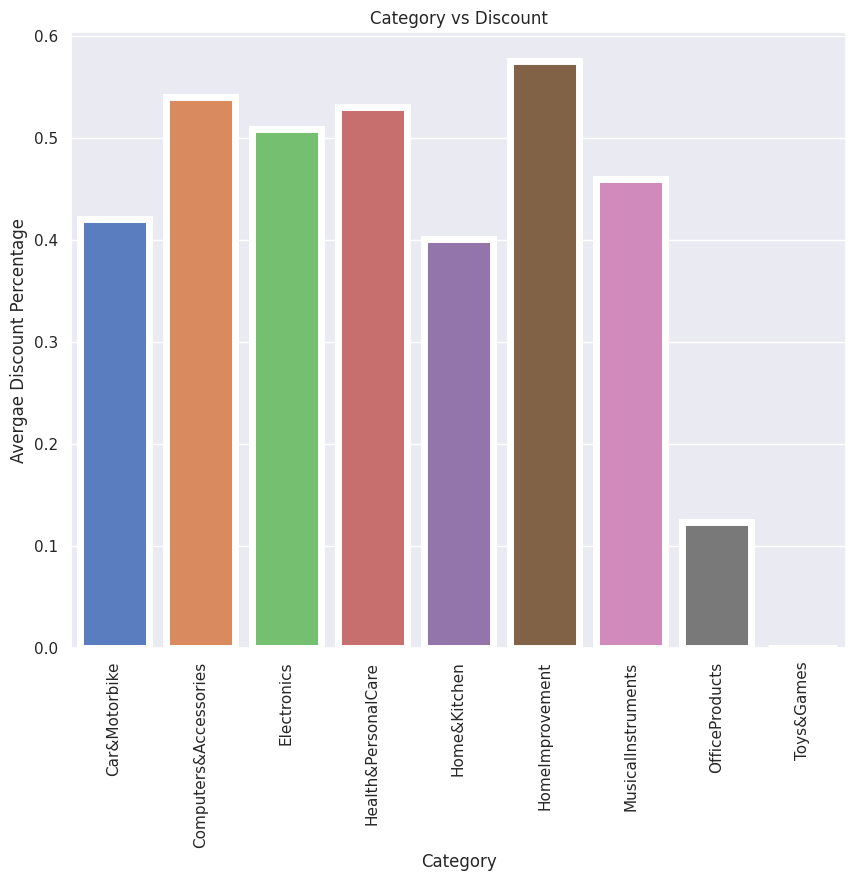

In [4]:
sns.set(style = "darkgrid")
plt.figure(figsize = (10,8))
sns.barplot(data = CategoryDis, x = "category", y = "discount_percentage", palette = "muted", edgecolor = "white", linewidth = 5)
plt.xlabel("Category")
plt.ylabel("Avergae Discount Percentage")
plt.title("Category vs Discount")
plt.xticks(rotation = "vertical")
plt.show()

# EDA-2 : Category and Rating  

In [5]:
CategoryRat = df.groupby("category")["rating"].mean().reset_index()
CategoryNRat = df.groupby("category")["rating_count"].sum().reset_index()
CategoryALL = pd.merge(CategoryRat, CategoryNRat, on = "category")
CategoryALL

,category,rating,rating_count
0,Car&Motorbike,3.800000,1118.0
1,Computers&Accessories,4.154967,7728689.0
2,Electronics,4.081749,15778848.0
3,Health&PersonalCare,4.000000,3663.0
4,Home&Kitchen,4.031696,2991069.0
5,HomeImprovement,4.250000,8566.0
6,MusicalInstruments,3.900000,88882.0
7,OfficeProducts,4.309677,149675.0
8,Toys&Games,4.300000,15867.0


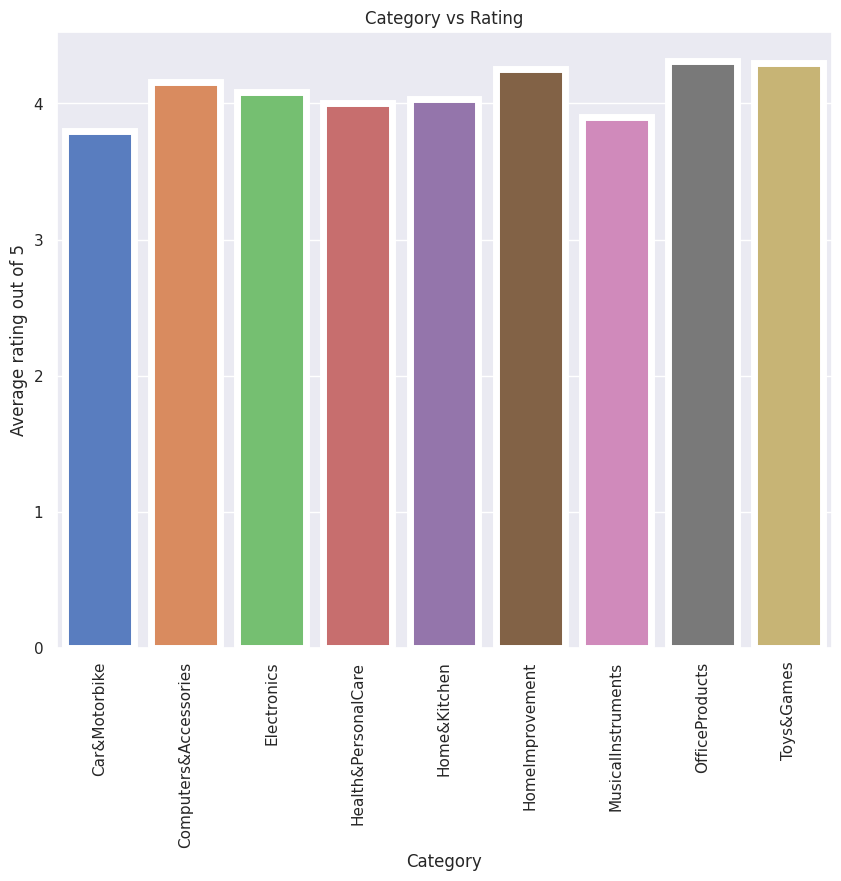

In [6]:
sns.set(style = "darkgrid")
plt.figure(figsize = (10,8))
sns.barplot(x='category', y="rating", data=CategoryALL, palette = "muted", edgecolor = "white", linewidth = 5)
plt.xlabel("Category")
plt.ylabel("Average rating out of 5")
plt.title("Category vs Rating")
plt.xticks(rotation = "vertical")
plt.show()

# EDA - 3: Best Selling Category

In [7]:
CategoryALL = CategoryALL.sort_values(by = "rating_count", ascending = False)
Top3 = CategoryALL[["category","rating_count"]].head(3)
Others = pd.DataFrame({'category': ['Others'], 'rating_count': [CategoryALL.iloc[3:]['rating_count'].sum()]})
SortedDF = pd.concat([Top3, Others], ignore_index = True)
SortedDF

,category,rating_count
0,Electronics,15778848.0
1,Computers&Accessories,7728689.0
2,Home&Kitchen,2991069.0
3,Others,267771.0


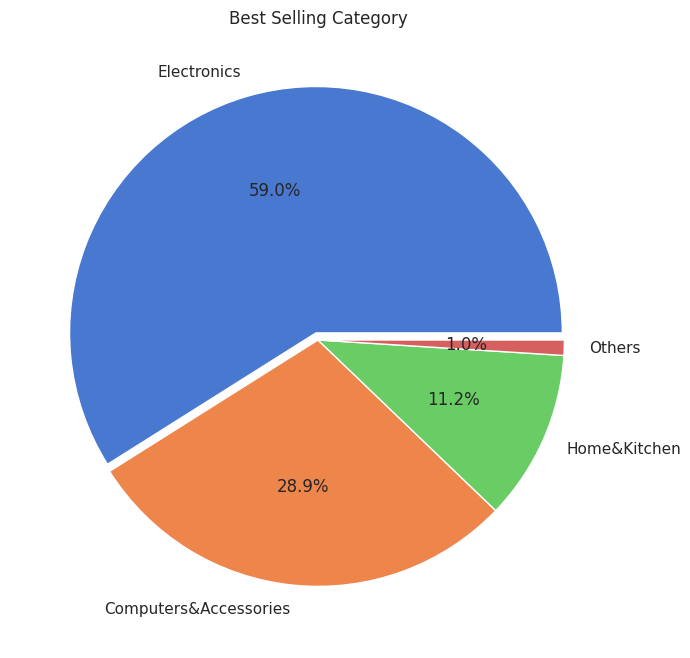

In [8]:
sns.set(style = "white")
explode = (0.03, 0, 0, 0)
plt.figure(figsize = (10,8))
plt.pie(SortedDF['rating_count'], labels=SortedDF['category'], autopct='%1.1f%%', colors=sns.color_palette("muted"), explode = explode)
plt.title("Best Selling Category")
plt.show()

# EDA-4 : Discount and Sales :

In [9]:
bins = [0, 0.1, 0.2 , 0.3 , 0.4 , 0.5 , 1]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
df['discount_range'] = pd.cut(df['discount_percentage'], bins=bins, labels=labels, right=False)

/tmp/ipykernel_18/1767616962.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DiscountNRAT = df.groupby('discount_range')["rating_count"].sum().reset_index()


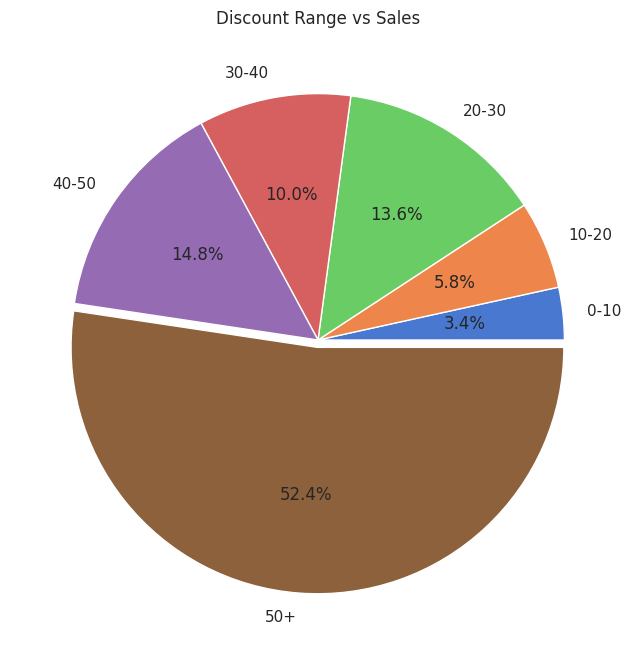

In [10]:
DiscountNRAT = df.groupby('discount_range')["rating_count"].sum().reset_index()
explode = (0,0,0,0,0,0.03)
sns.set(style = "white")
plt.figure(figsize = (10,8))
plt.pie(DiscountNRAT['rating_count'], labels=DiscountNRAT['discount_range'], autopct='%1.1f%%', colors=sns.color_palette('muted'), explode = explode)
plt.title("Discount Range vs Sales")
plt.show()

# EDA-5 : Discount vs Ratings

/tmp/ipykernel_18/1670422845.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DicountRat = df.groupby("discount_range")["rating"].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


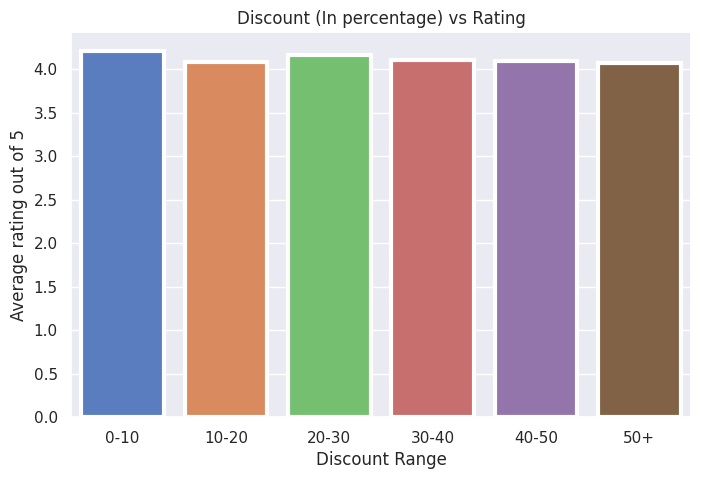

In [11]:
DicountRat = df.groupby("discount_range")["rating"].mean().reset_index()
sns.set(style = "darkgrid")
plt.figure(figsize = (8,5))
sns.barplot(x='discount_range', y="rating", data=DicountRat, palette = "muted", edgecolor = "white", linewidth = 3)
plt.xlabel("Discount Range")
plt.ylabel("Average rating out of 5")
plt.title("Discount (In percentage) vs Rating")
plt.show()

# EDA-6 : Discount Price vs Sales:

In [12]:
bins = [0, 2000, 4000 , 8000 , 15000, 100000]
labels = ['Upto Rs.2000', 'Upto Rs.4000', 'Upto Rs.8000', 'Upto Rs.15000', 'Above Rs.15000']
df['Discount_price_range'] = pd.cut(df['discounted_price'], bins=bins, labels=labels, right=False)

/tmp/ipykernel_18/3157052841.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DiscountPrice = df.groupby("Discount_price_range")["rating_count"].sum().reset_index()


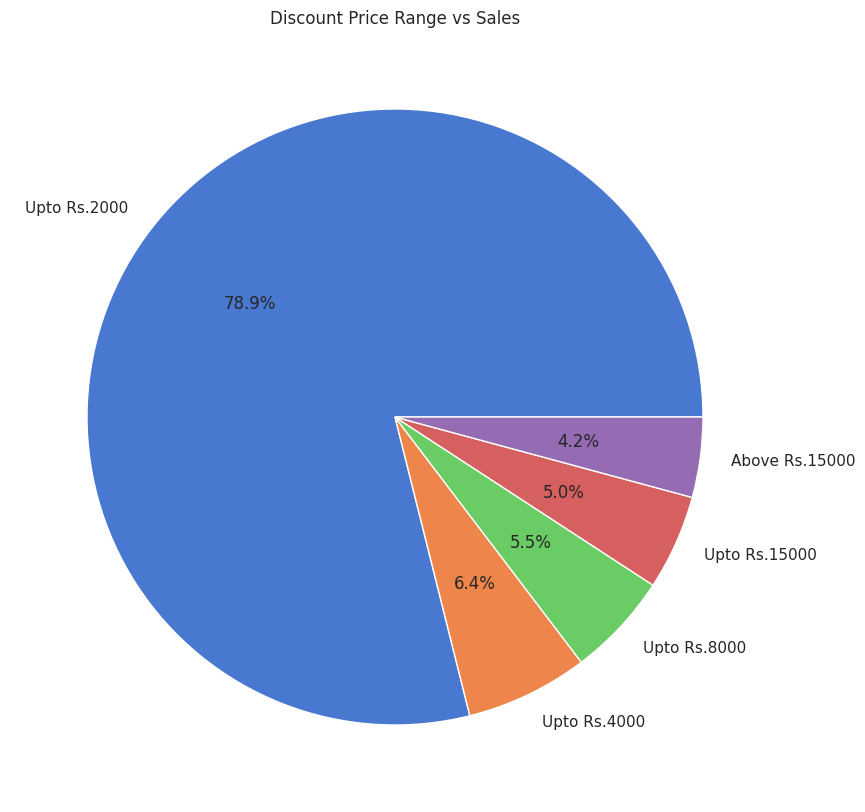

In [13]:
DiscountPrice = df.groupby("Discount_price_range")["rating_count"].sum().reset_index()
sns.set(style = "white")
plt.figure(figsize = (15,10))
plt.pie(DiscountPrice['rating_count'], labels=DiscountPrice['Discount_price_range'], autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title("Discount Price Range vs Sales")
plt.show()

# EDA-7: Sales of product with Lenght of Description

In [14]:
df["Desc_lngt"] = df["about_product"].str.len()
bins = [0, 200, 400 , 800, 1500, 2000, 10000]
labels = ['0-200 Characters', '200-400 Characters', '400-800 Characters', '800-1500 Characters', '1500-2000 Characters', 'Over 2000 Characters']
df["Discount_price_range"] = pd.cut(df['discounted_price'], bins=bins, labels=labels, right=False)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


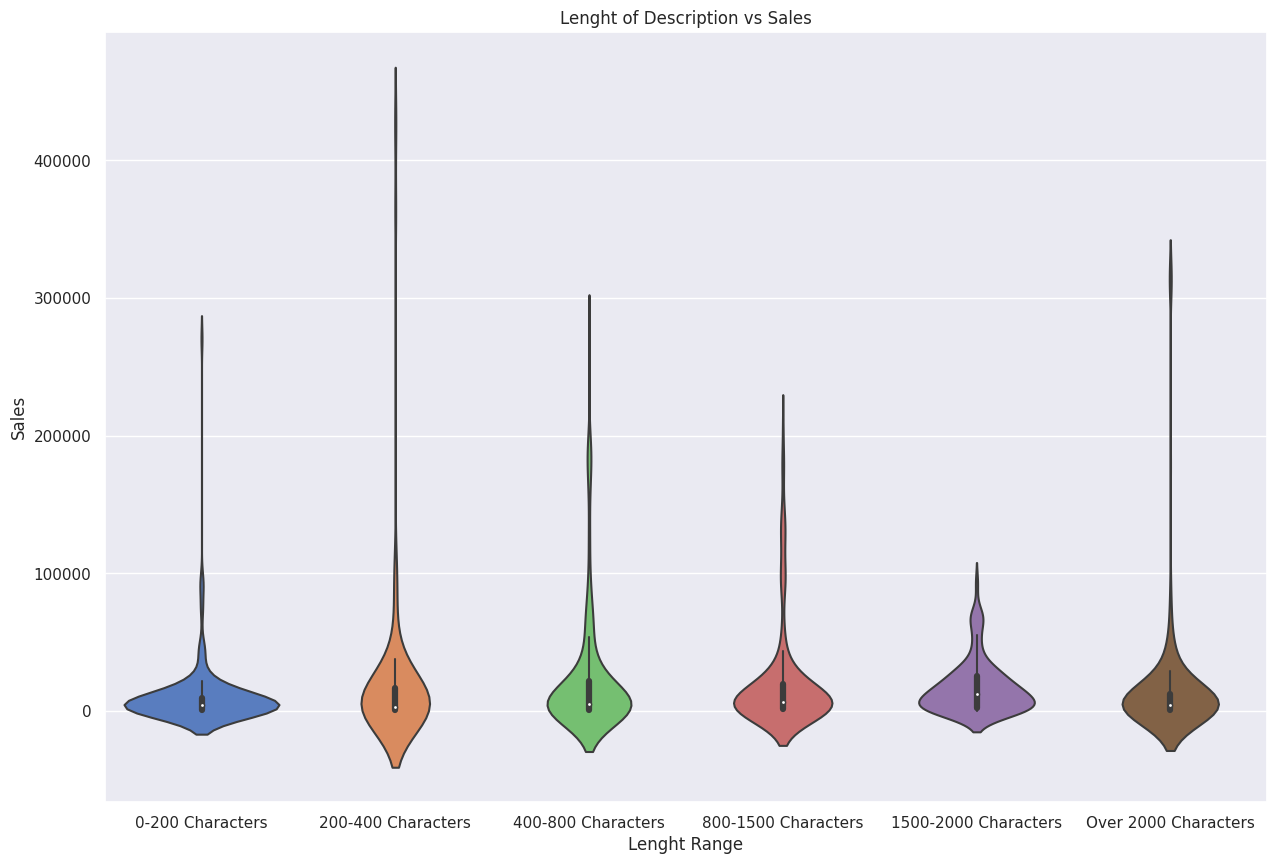

In [15]:
sns.set(style = "darkgrid")
plt.figure(figsize = (15,10))
sns.violinplot(x = "Discount_price_range", y = "rating_count", data = df, palette = "muted")
plt.xlabel("Lenght Range")
plt.ylabel("Sales")
plt.title("Lenght of Description vs Sales")
plt.show()

# EDA-8 : Top and Least Selling product:

In [16]:
df1 = pd.read_csv("/kaggle/input/amazon-sales-dataset/Amazon.csv")
df1["category"] = df1["category"].str.split("|").str[-1]
df1["rating_count"] = df1["rating_count"].str.replace(",", "")
df1["rating_count"] = df1["rating_count"].astype(float)

In [17]:
ProductNRat = df1.groupby("category")["rating_count"].sum().reset_index()
ProductNRat = ProductNRat.sort_values(by = "rating_count", ascending = False)
ProductNRat['rank'] = ProductNRat['rating_count'].rank(ascending=False)

**Top Selling Products Type** : 

In [18]:
ProductNRat.reset_index(drop = True, inplace = True)
ProductNRat.head(20)

,category,rating_count,rank
0,In-Ear,4204939.0,1.0
1,USBCables,3547816.0,2.0
2,Smartphones,2493269.0,3.0
3,HDMICables,1906054.0,4.0
4,SmartWatches,1644476.0,5.0
5,MicroSD,1113592.0,6.0
6,PenDrives,774744.0,7.0
7,SmartTelevisions,760279.0,8.0
8,WirelessUSBAdapters,727113.0,9.0
9,PowerBanks,688810.0,10.0


**Least Selling Product Type** : 

In [19]:
ProductNRat.reset_index(drop = True, inplace = True)
ProductNRat.tail(20)

,category,rating_count,rank
187,InkjetInkRefills&Kits,1367.0,188.0
188,HandlebarMounts,1193.0,189.0
189,HalogenHeaters,1127.0,190.0
190,AirPurifiers&Ionizers,1118.0,191.0
191,CoffeePresses,1065.0,192.0
192,AVReceivers&Amplifiers,897.0,193.0
193,SATACables,817.0,194.0
194,3DGlasses,621.0,195.0
195,Earpads,594.0,196.0
196,StovetopEspressoPots,590.0,197.0
